In [1]:
# 사용되는 라이브러리
import os # Operating System 
import numpy as np # Numerical Python: 수학 연산
from scipy import stats # Statistics
import pandas as pd # DataFrame 처리

import matplotlib.pyplot as plt # MATLAB Graph

import seaborn as sns # MATLAB Graph


import geopandas as gpd # Spatial Data 처리

from scipy.stats import pearsonr # 피어슨 상관분석

# import math
# import matplotlib.cm as cm
# import statsmodels.api as sm

# 소수점 이하 4자리까지 표시
pd.options.display.float_format = '{:.4f}'.format

In [2]:
# 현재 작업 디렉토리 확인
os.getcwd()

# 새로운 작업 디렉토리로 변경
# os.chdir("/path/to/your/new/directory")

'c:\\Users\\Cho\\Desktop\\2024-1\\스마트 관광원 특강\\GEO_TOUR_2024_최종\\GEO_TOUR_2024'

In [3]:
# 현재 작업 디렉토리의 파일 목록 확인
os.listdir()

['3-1.Data.ipynb',
 '3-2.Random Forest and XAI.ipynb',
 'Income.csv',
 'kallikraths_Income.dbf',
 'kallikraths_Income.prj',
 'kallikraths_Income.sbn',
 'kallikraths_Income.sbx',
 'kallikraths_Income.shp',
 'kallikraths_Income.shp.xml',
 'kallikraths_Income.shx']

In [4]:
# 입력자료 불러오기
df = pd.read_csv('Income.csv')
df

,X,Y,UnemrT01,PrSect01,Foreig01,Income01
0,616259.0078,4551127.2411,5.2213,21.8179,1.9968,10969.3153
1,644783.1356,4561364.0355,2.1542,92.9124,0.0383,6398.6415
2,602100.9505,4555689.1377,6.0624,70.2068,1.3400,6608.8975
3,633712.4684,4539548.4898,7.4219,57.7481,0.8902,6700.3753
4,517831.1952,4572544.4784,10.8511,7.2988,2.9616,11299.1065
...,...,...,...,...,...,...
320,507562.9646,3855767.6568,0.3500,51.3514,9.8765,8498.0803
321,475420.5821,3905917.9493,2.2846,61.5258,14.6802,7989.9584
322,465887.9907,3920086.9471,5.1913,45.7012,7.9163,8750.0301
323,484468.9696,3924050.7531,5.9384,51.3057,8.8894,8120.0271


<Axes: >

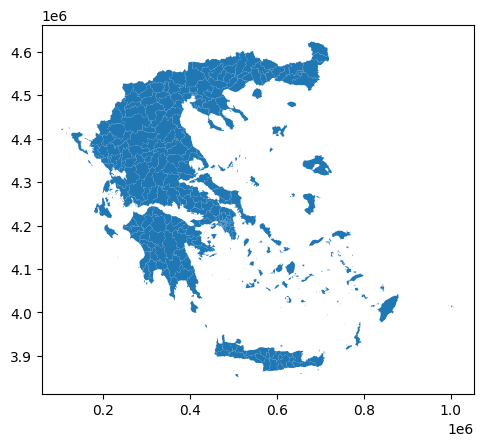

In [5]:
gdf = gpd.read_file('kallikraths_Income.shp')
gdf
gdf.plot()

# 랜덤 포레스트 회귀

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [7]:
# 독립변수 
X = df[['UnemrT01', 'PrSect01', 'Foreig01']]

# 종속변수
Y = df['Income01']

In [8]:
# 훈련, 검증 데이터 분할
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state=1 # 데이터 분할 재현성을 위해 난수 시드 고정
                                                    )

In [9]:
# 분할된 데이터셋 확인
X_train
# X_test
# y_train
# y_test

,UnemrT01,PrSect01,Foreig01
42,3.4899,56.6067,2.3038
132,6.8664,32.8418,6.3456
172,5.9788,29.0705,7.3599
162,6.2597,43.1987,2.3749
177,6.8561,6.8522,9.6312
...,...,...,...
203,4.9436,0.4559,4.8056
255,11.9653,10.3521,7.7300
72,5.8296,5.2750,4.7391
235,5.8342,1.1695,8.5094


In [10]:
# 랜덤포레스트 회귀 객체 생성
regr = RandomForestRegressor(random_state=2) # 회귀모형의 재현성을 위해 난수 시드 고정

In [11]:
# 최적의 파라미터 탐색: GridSearch CV
from sklearn.model_selection import GridSearchCV

# 시행할 파라미터 생성
parameters = {
    'n_estimators': [10, 50, 100, 200], # 결정나무 개수
    'max_features': [len(X.columns)], # 노드 분할에 고려될 독립변수의 최대 개수
    # 'min_samples_split': [], # 노드를 분할하기 위한 최소한의 표본 데이터 개수
    # 'min_samples_leaf':[], # Leaf node가 되기 위한 최소한의 표본 데이터 개수
    # 'max_leaf_nodes':[], # Leaf node의 최대 개수
    'max_depth':[5], # 결정나무의 최대 깊이
}

clf = GridSearchCV(regr, parameters, 
                   cv=KFold(n_splits=5, # 5-Fold Cross Validation 
                            shuffle=True, # 입력자료 순서를 무작위로 섞음
                            random_state=3 # 파라미터 탐색의 재현성을 위한 난수 시드 고정 
                            ),  
                   n_jobs=-1, # 사용 가능한 모든 CPU를 계산에 사용
                   return_train_score=True)

# Train dataset으로 최적의 파라미터 탐색 및 RF 모형 생성
clf.fit(X_train, y_train)

# 최적의 파라미터와 모형 
best_model = clf.best_estimator_

print(f'최적 하이퍼 파라미터: {clf.best_params_}')
print(f'최고 예측 정확도: {(clf.best_score_)*100:.4f}') # 5-Fold CV의 평균 점수

최적 하이퍼 파라미터: {'max_depth': 5, 'max_features': 3, 'n_estimators': 100}
최고 예측 정확도: 67.4874


In [12]:
# Test dataset에 최적의 파라미터로 생성된 RF 모형 적용
y_pred = clf.predict(X_test)

## RF 결과 

Train Mean Squared Error: 873575.3915043861
Train Mean Absolute Error: 684.7423478927357
Train dataset R² Score: 0.9019361822941306


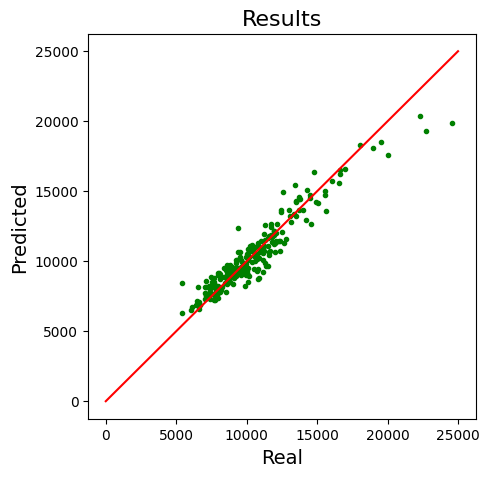

In [13]:
## Train dataset
# MSE 계산
y_pred_train = clf.predict(X_train)
train_mse =  mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error:", train_mse)

# MAE 계산
train_mae = mean_absolute_error(y_train, y_pred_train)
print("Train Mean Absolute Error:", train_mae)

# R² 계산
train_r2 = r2_score(y_train, y_pred_train)
print("Train dataset R² Score:", train_r2)

train_results = pd.DataFrame(zip(y_train, y_pred_train, y_train - y_pred_train), columns = ['y_train', 'y_pred_train', 'error'])
plt.figure(figsize=(5,5))
x=np.linspace(0,25000)
plt.plot(train_results['y_train'], train_results['y_pred_train'], 'g.')
plt.plot(x, x, 'r-')
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.show()

Test Mean Squared Error: 1949400.0873238137
Test Mean Absolute Error: 912.5327356596321
Test dataset R² Score: 0.7562738629035792


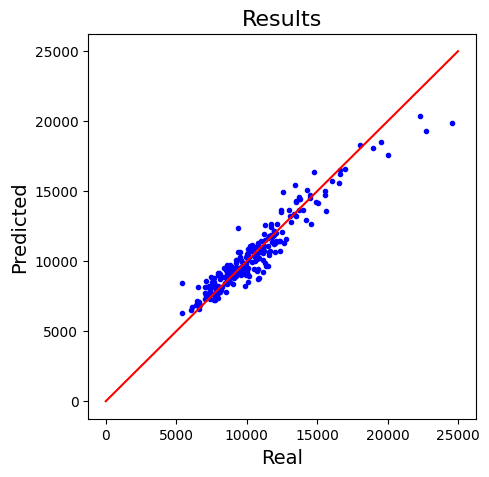

In [14]:
## Test dataset
# MSE 계산
test_mse =  mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", test_mse)

# MAE 계산
test_mae = mean_absolute_error(y_test, y_pred)
print("Test Mean Absolute Error:", test_mae)

# R² 값을 계산
test_r2 = r2_score(y_test, y_pred)
print("Test dataset R² Score:", test_r2)

train_results = pd.DataFrame(zip(y_train, y_pred_train, y_train - y_pred_train), columns = ['y_train', 'y_pred_train', 'error'])
plt.figure(figsize=(5,5))
x=np.linspace(0,25000)
plt.plot(train_results['y_train'], train_results['y_pred_train'], 'b.')
plt.plot(x, x, 'r-')
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.show()

## Tree 시각화

In [15]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pydot

# Forest에서 0번째에 있는 Tree 가져오기 
tree = best_model.estimators_[0]

# # .dot 확장자로 Tree 저장
# from sklearn.tree import export_graphviz
# export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('tree.dot')

# 그래프를 png 파일로 저장
graph.write_png('tree.png')

# Tree의 깊이 
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 5


## 중요도(Feature Importance) 시각화

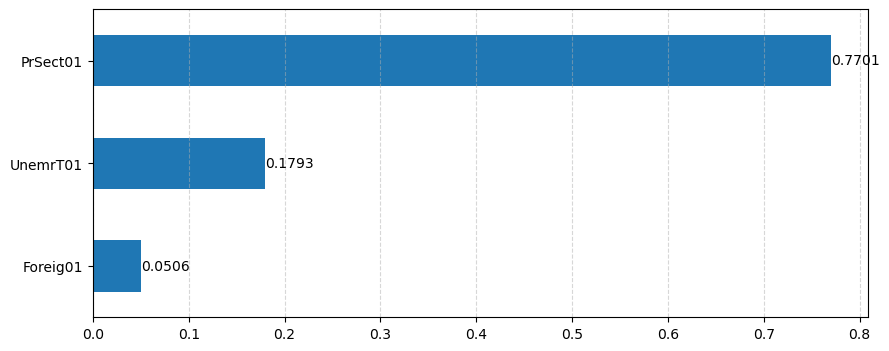

In [19]:
# Feature importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Feature importance 정렬
feature_importances_sorted = feature_importances.sort_values(ascending=True)

# 막대그래프 생성
fig, ax = plt.subplots(figsize=(10, 4))  # 원하는 크기로 조절
feature_importances_sorted.plot.barh(ax=ax)

# 그리드 추가
ax.grid(axis='x', linestyle='--', alpha=0.5)

# 각 막대에 값 표기
for i, v in enumerate(feature_importances_sorted):
    ax.text(v, i, f'{v:.4f}', color='black', va='center')

plt.show()

# SHAP

In [22]:
pip install shap

     -------------------------------------- 450.3/450.3 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
# RF 모형에 SHAP 적용
import shap
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer.shap_values(X_test)

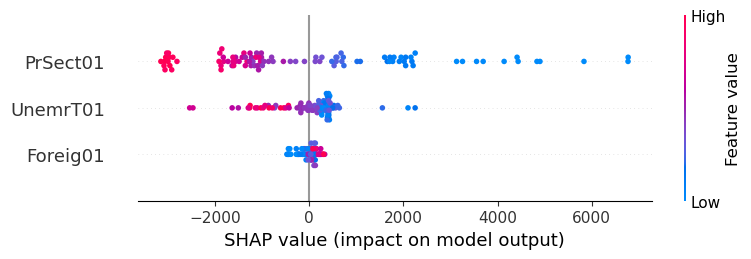

In [24]:
shap.summary_plot(shap_values, X_test)
# SHAP이 음수 = 예측값 감소, 양수 = 예측값 증가

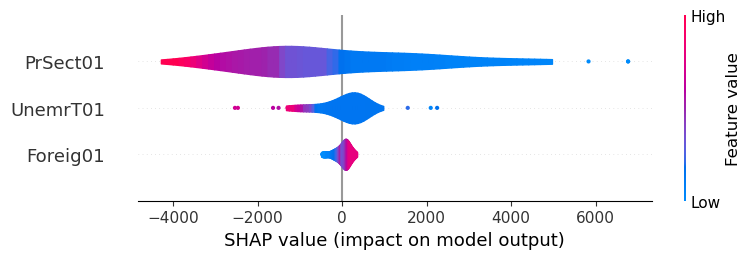

In [25]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

In [26]:
X.columns

Index(['UnemrT01', 'PrSect01', 'Foreig01'], dtype='object')

In [27]:
shap_values[0]

array([-189.32085597, -860.80465344,  124.26270702])

# Partial Dependence Plot(PDP)

In [63]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

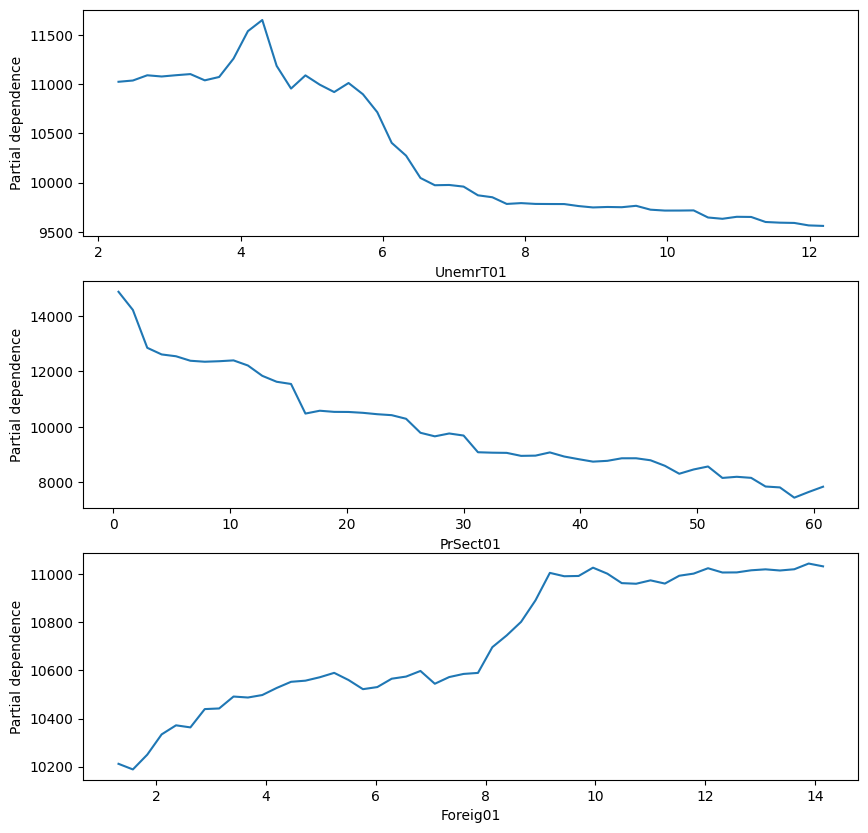

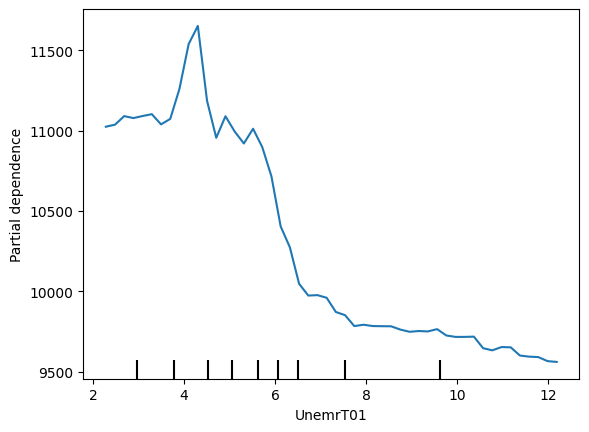

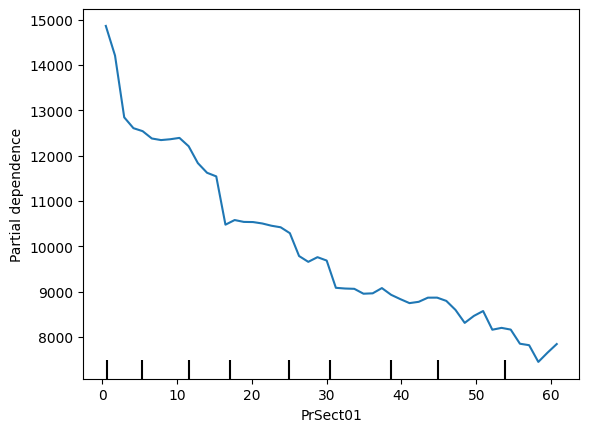

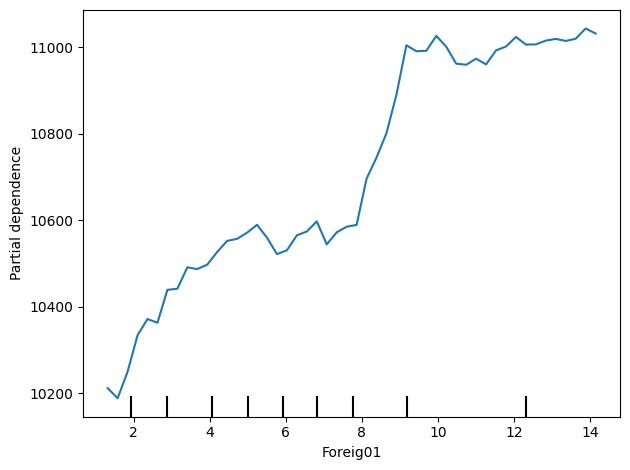

In [65]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))  # 3x3 subplot 생성

for feature_index, ax in enumerate(axs.flatten()):
    if feature_index < 12:  # feature_index가 0부터 6까지인 경우
        pdp_display = PartialDependenceDisplay.from_estimator(
            clf,
            X,
            [feature_index],
            feature_names=X.columns,
            kind='average',
            grid_resolution=50
        )
        pdp_display.plot(ax=ax)  # 각 subplot에 새로운 ax 할당
        # ax.set_ylim(35.6, 40.6)  # y축 범위 설정
        plt.setp(pdp_display.deciles_vlines_, visible=False)

# subplot들 간의 간격 조절
plt.tight_layout()

# 데이터 분포 Decile 
plt.setp(pdp_display.deciles_vlines_, visible=False)

plt.show()

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))  # 3x3 subplot 생성

for feature_index, ax in enumerate(axs.flatten()):
    if feature_index < 12:  # feature_index가 0부터 6까지인 경우
        pdp_display = PartialDependenceDisplay.from_estimator(
            clf,
            X,
            [feature_index],
            feature_names=X.columns,
            kind='average',
            grid_resolution=50
        )
        pdp_display.plot(ax=ax)  # 각 subplot에 새로운 ax 할당
        # ax.set_ylim(35.6, 40.6)  # y축 범위 설정
        plt.setp(pdp_display.deciles_vlines_, visible=False)

# subplot들 간의 간격 조절
plt.tight_layout()

# 데이터 분포 Decile 
plt.setp(pdp_display.deciles_vlines_, visible=False)

plt.show()